<a href="https://colab.research.google.com/github/GitMarco27/TMML/blob/main/Notebooks/005_Energy_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Minutes Machine Learning
## Episode 5: Energy Efficiency Data Set 

#### Marco Sanguineti, 2021
---
Welcome to 3 minutes Machine Learning!

Reference: https://archive.ics.uci.edu/ml/datasets/energy+efficiency

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
print(tf.__version__)

2.5.0


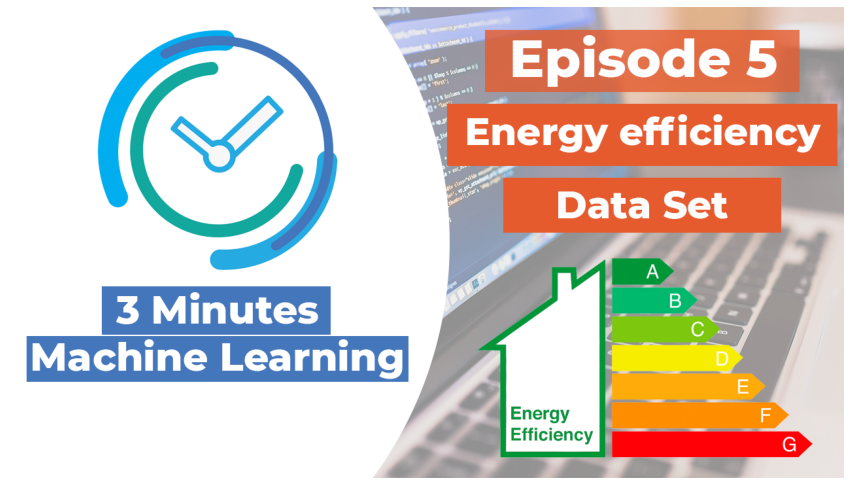

In [3]:
def loadThumb(path):
  # Let's import this video thumbnail!
  myThumb = plt.imread(path)
  fig, ax = plt.subplots(figsize=(15, 10))
  plt.axis('off')
  ax.imshow(myThumb)
  plt.show()

# loadThumb('/tmp/yt_thumb_005.png')


#### Video Topics
> 1. Load the dataset from UCI.edu
> 2. Create a model with the keras API
> 3. Train the model and check the results
> 4. See you on next video! 

# Load the dataset
___

In [4]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
dataset = pd.read_excel(URL)
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


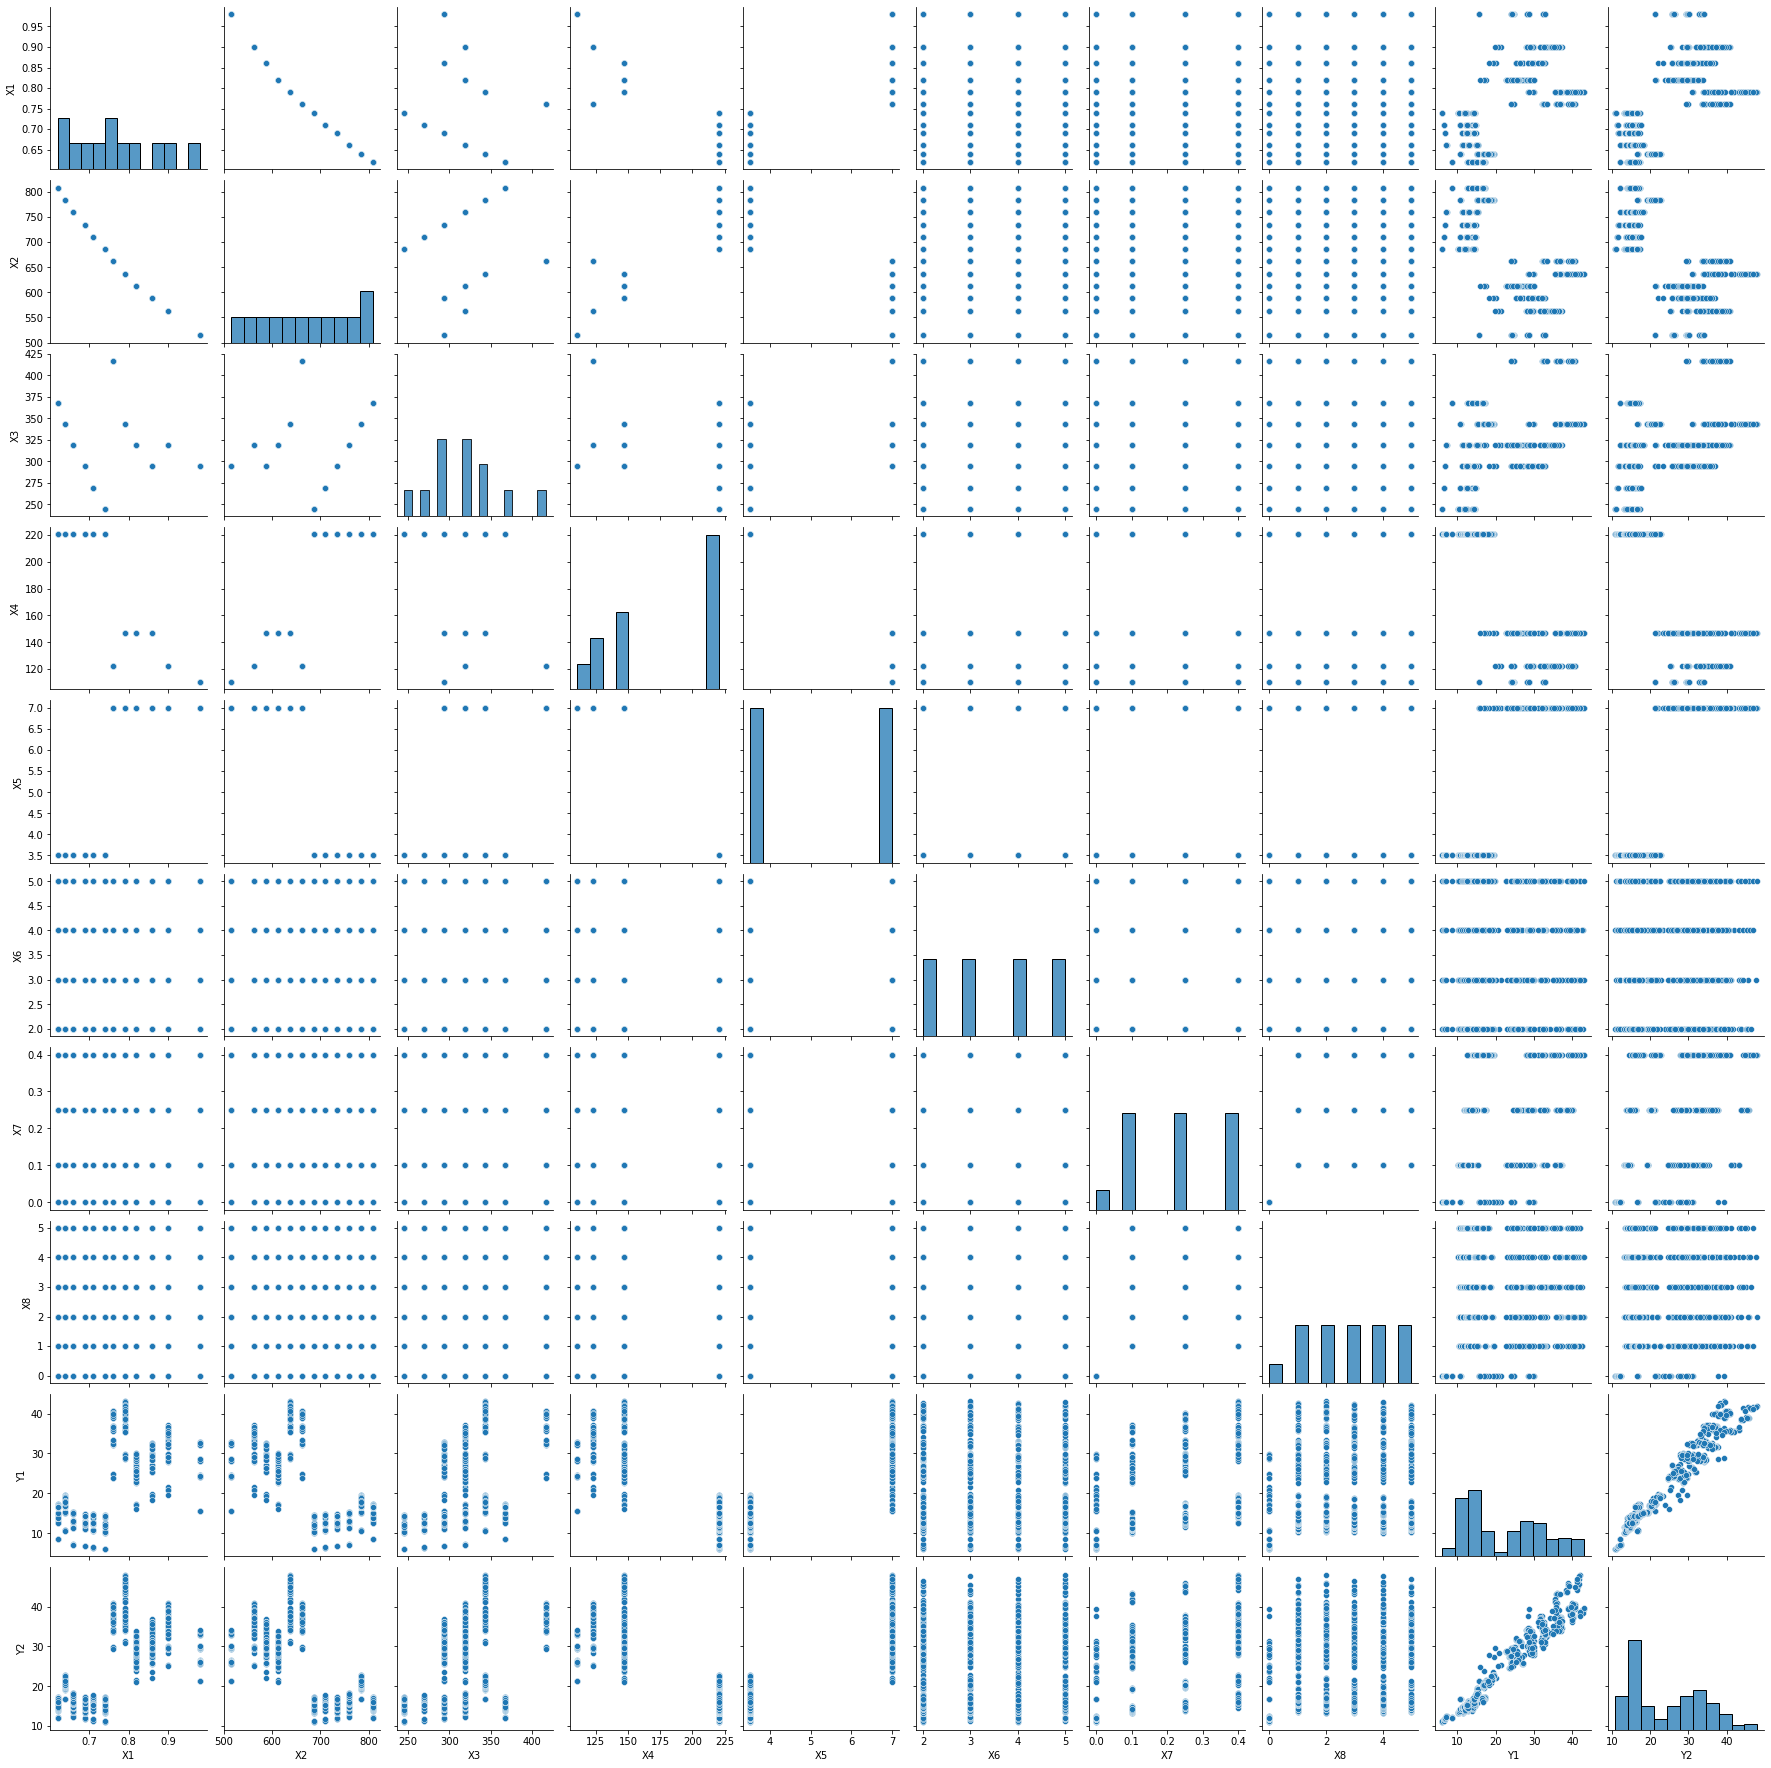

In [6]:
sns.pairplot(dataset)
plt.show()

# Create the model
___

In [7]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [8]:
input_data = Input(shape=(8), name='Input')
dense1 = Dense(256, activation=tf.nn.relu)(input_data)
dense2 = Dense(256, activation=tf.nn.relu)(dense1)
output = Dense(2, name='output')(dense2)

model = Model(input_data, output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae', 'mse', 'mape'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 256)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
output (Dense)               (None, 2)                 514       
Total params: 68,610
Trainable params: 68,610
Non-trainable params: 0
_________________________________________________________________


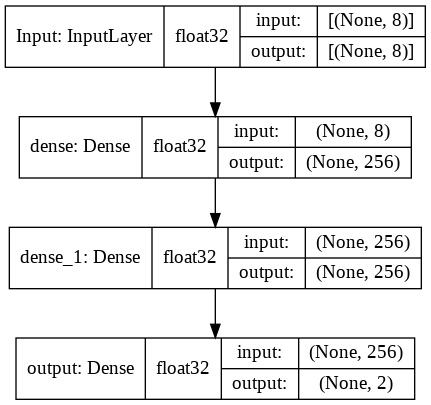

In [9]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [10]:
def separate(df):
  return df[['Y1', 'Y2']].to_numpy(), df.drop(df[['Y1', 'Y2']], axis=1).to_numpy()

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
df_normed = pd.DataFrame(min_max_scaler.fit_transform(dataset))
df_normed.columns = list(dataset.columns)
train_set, test_set = train_test_split(df_normed)
train_labels, train_features = separate(train_set)
test_labels, test_features = separate(test_set)

# Train and check the results
___

In [12]:
history = model.fit(
    train_features,
    train_labels,
    batch_size = 128,
    epochs=500,
    validation_data=(test_features,
                     test_labels)
)

Epoch 1/500
5/5 [==============================] - 1s 58ms/step - loss: 0.1542 - mae: 0.3061 - mse: 0.1542 - mape: 66326.6484 - val_loss: 0.0657 - val_mae: 0.2218 - val_mse: 0.0657 - val_mape: 292.5373
Epoch 2/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0531 - mae: 0.1978 - mse: 0.0531 - mape: 428441.3438 - val_loss: 0.0213 - val_mae: 0.1258 - val_mse: 0.0213 - val_mape: 149.3828
Epoch 3/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0143 - mae: 0.0937 - mse: 0.0143 - mape: 317417.0312 - val_loss: 0.0182 - val_mae: 0.1114 - val_mse: 0.0182 - val_mape: 44.4809
Epoch 4/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0182 - mae: 0.1089 - mse: 0.0182 - mape: 6729.0957 - val_loss: 0.0135 - val_mae: 0.0916 - val_mse: 0.0135 - val_mape: 38.4589
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0109 - mae: 0.0796 - mse: 0.0109 - mape: 72579.7969 - val_loss: 0.0092 - val_mae: 0.0697 - val_mse: 0.0092 - val_mape: 46.6

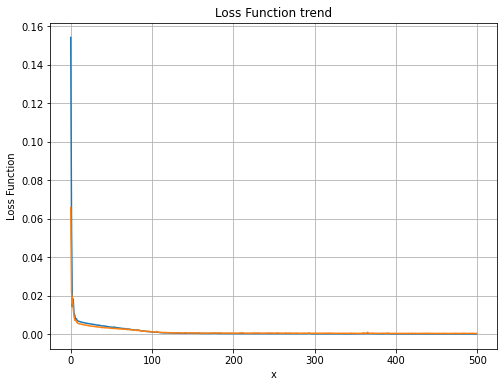

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(loss)
plt.plot(val_loss)
plt.grid('both')
plt.xlabel('x')
plt.ylabel('Loss Function')
plt.title('Loss Function trend')
plt.show()


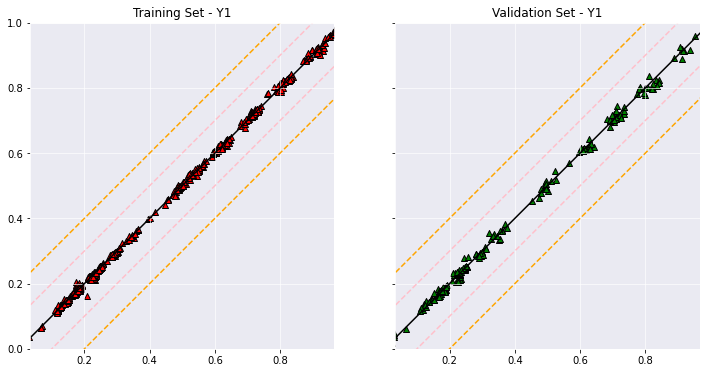

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax[0].axis('equal')
ax[0].scatter(train_labels[:, 0], model.predict(train_features)[:, 0], marker='^',
          color='r', edgecolor='k')
ax[0].plot([0, 1], [0, 1], c='k')
ax[0].plot([0, 1], [0.2, 1.2],'--', c='orange')
ax[0].plot([0, 1], [-0.2, 0.8],'--', c='orange')
ax[0].plot([0, 1], [0.1, 1.1],'--', c='pink')
ax[0].plot([0, 1], [-0.1, 0.9],'--', c='pink')
ax[0].set_title('Training Set - Y1')
ax[0].set_ylim(0, 1)
ax[0].grid(which='both', alpha=0.8, c='white')
ax[0].set_facecolor('#eaeaf2')
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['right'].set_color('white')
ax[0].spines['left'].set_color('white')

ax[1].axis('equal')
ax[1].scatter(test_labels[:, 0], model.predict(test_features)[:, 0], marker='^',
          color='g', edgecolor='k')
ax[1].plot([0, 1], [0, 1], c='k')
ax[1].plot([0, 1], [0.2, 1.2],'--', c='orange')
ax[1].plot([0, 1], [-0.2, 0.8],'--', c='orange')
ax[1].plot([0, 1], [0.1, 1.1],'--', c='pink')
ax[1].plot([0, 1], [-0.1, 0.9],'--', c='pink')
ax[1].set_title('Validation Set - Y1')
ax[1].set_ylim(0, 1)
ax[1].grid(which='both', alpha=0.8, c='white')
ax[1].set_facecolor('#eaeaf2')
ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('white')
ax[1].spines['right'].set_color('white')
ax[1].spines['left'].set_color('white')

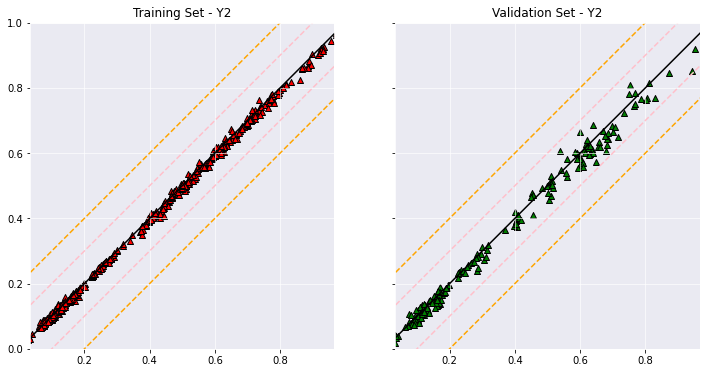

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax[0].axis('equal')
ax[0].scatter(train_labels[:, 1], model.predict(train_features)[:, 1], marker='^',
          color='r', edgecolor='k')
ax[0].plot([0, 1], [0, 1], c='k')
ax[0].plot([0, 1], [0.2, 1.2],'--', c='orange')
ax[0].plot([0, 1], [-0.2, 0.8],'--', c='orange')
ax[0].plot([0, 1], [0.1, 1.1],'--', c='pink')
ax[0].plot([0, 1], [-0.1, 0.9],'--', c='pink')
ax[0].set_title('Training Set - Y2')
ax[0].set_ylim(0, 1)
ax[0].grid(which='both', alpha=0.8, c='white')
ax[0].set_facecolor('#eaeaf2')
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['right'].set_color('white')
ax[0].spines['left'].set_color('white')

ax[1].axis('equal')
ax[1].scatter(test_labels[:, 1], model.predict(test_features)[:, 1], marker='^',
          color='g', edgecolor='k')
ax[1].plot([0, 1], [0, 1], c='k')
ax[1].plot([0, 1], [0.2, 1.2],'--', c='orange')
ax[1].plot([0, 1], [-0.2, 0.8],'--', c='orange')
ax[1].plot([0, 1], [0.1, 1.1],'--', c='pink')
ax[1].plot([0, 1], [-0.1, 0.9],'--', c='pink')
ax[1].set_title('Validation Set - Y2')
ax[1].set_ylim(0, 1)
ax[1].grid(which='both', alpha=0.8, c='white')
ax[1].set_facecolor('#eaeaf2')
ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('white')
ax[1].spines['right'].set_color('white')
ax[1].spines['left'].set_color('white')

In [16]:
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
for i in range(np.shape(train_labels)[1]): 
  metrics= {
      'mae-train': np.mean(np.abs(train_labels[:, i] - model.predict(train_features)[:, i])),
      'mse-train': np.mean(np.square(train_labels[:, i] - model.predict(train_features)[:, i])),
      'r2-train': r2_score(train_labels[:, i], model.predict(train_features)[:, i]),
      'pearson-train': pearsonr(train_labels[:, i], model.predict(train_features)[:, i])[0],
      'mae-test': np.mean(np.abs(test_labels[:, i] - model.predict(test_features)[:, i])),
      'mse-test': np.mean(np.square(test_labels[:, i] - model.predict(test_features)[:, i])),
      'r2-test': r2_score(test_labels[:, i] ,model.predict(test_features)[:, i]),
      'pearson-test': pearsonr(test_labels[:, i], model.predict(test_features)[:, i])[0]
  }

  blue = lambda x: '\033[94m' + x + '\033[0m'
  yellow = lambda x: '\033[93m' + x + '\033[0m'

  for key in metrics:
      if 'train' in key:
          print(f'Y{i} - {blue(key)} - {str(metrics[key])[:7]}')
      else:
          print(f'Y{i} - {yellow(key)} - {str(metrics[key])[:7]}')

Y0 - mae-train - 0.00474
Y0 - mse-train - 4.44430
Y0 - r2-train - 0.99940
Y0 - pearson-train - 0.99972
Y0 - mae-test - 0.00947
Y0 - mse-test - 0.00015
Y0 - r2-test - 0.99783
Y0 - pearson-test - 0.99896
Y1 - mae-train - 0.00685
Y1 - mse-train - 8.63810
Y1 - r2-train - 0.99870
Y1 - pearson-train - 0.99951
Y1 - mae-test - 0.01739
Y1 - mse-test - 0.00058
Y1 - r2-test - 0.99042
Y1 - pearson-test - 0.99606


# Greetings
---

In [ ]:
!pip install art
from art import tprint, aprint
tprint('See you on next videos!')
def subscribe():
  """
  Attractive subscription form
  """
  aprint("giveme", number=5)
  print(f'\n\tLike and subscribe to support this work!\n')
  aprint("giveme", number=5)
subscribe()